## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



In [1]:
#pip install 

###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_path = Path("./Resources/bitstamp.csv")
bitstamp = pd.read_csv(
    bitstamp_path,
    index_col = "Timestamp",
    parse_dates = True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
2018-01-01 00:05:00,13620.00,13634.15,13610.00,$13610.0,4.716162,64226.303028,13618.341726
2018-01-01 00:06:00,13610.00,13650.18,13590.42,$13600.56,26.432759,360108.155630,13623.555198
2018-01-01 00:07:00,13593.99,13595.41,13566.93,$13580.0,10.674241,144961.611180,13580.507983
2018-01-01 00:08:00,13580.00,13580.00,13547.59,$13579.0,19.322370,261942.833550,13556.454543


In [5]:
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [6]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_path = Path("./Resources/coinbase.csv")
coinbase = pd.read_csv(
    coinbase_path,
    index_col = "Timestamp",
    parse_dates = True
)

In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [9]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [10]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [11]:
bitstamp=bitstamp.dropna()

In [12]:
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [13]:
# Use the str.replace function to remove the dollar sign, 
bitstamp.loc[:,"Close"]=bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp

C:\Users\Saidee\AppData\Local\Temp\ipykernel_14700\1350999282.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"]=bitstamp.loc[:,"Close"].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [14]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [15]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [16]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [17]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase=coinbase.dropna()
coinbase


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [18]:
coinbase.loc[:,"Close"]=coinbase.loc[:,"Close"].str.replace("$","")
coinbase

C:\Users\Saidee\AppData\Local\Temp\ipykernel_14700\503903540.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"]=coinbase.loc[:,"Close"].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [19]:
coinbase.loc[:, "Close"] =coinbase.loc[:, "Close"].astype("float")
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [20]:
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [21]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [22]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]]
print()
bitstamp_sliced.head()

# Review the first five rows of the DataFrame


,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [23]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[3]]
print()
coinbase_sliced.head()

# Review the first five rows of the DataFrame
# YOUR CODE HERE

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [24]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [25]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'BITSTAMP PRICES'}, xlabel='Timestamp'>

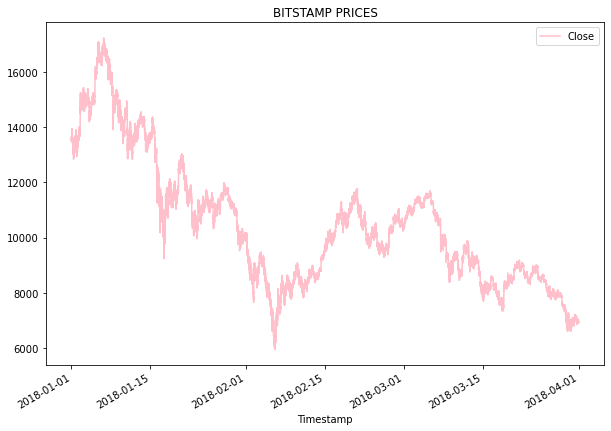

In [26]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10,7),
                     title="BITSTAMP PRICES",
                     color="pink")

<AxesSubplot:title={'center':'COINBASE PRICES'}, xlabel='Timestamp'>

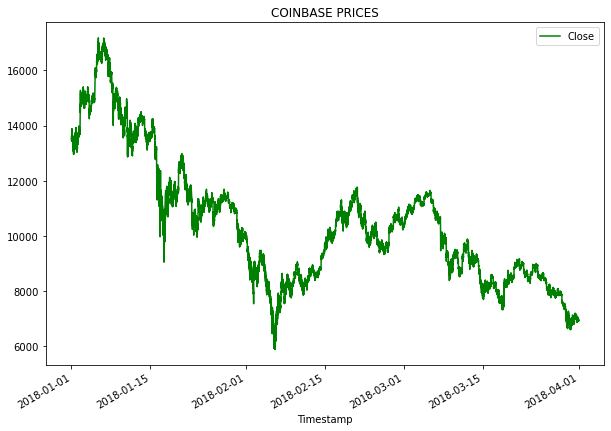

In [27]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10,7),
                     title="COINBASE PRICES",
                     color="green")

<AxesSubplot:title={'center':'BITSTAMP vs COINBASE PRICES'}, xlabel='Timestamp'>

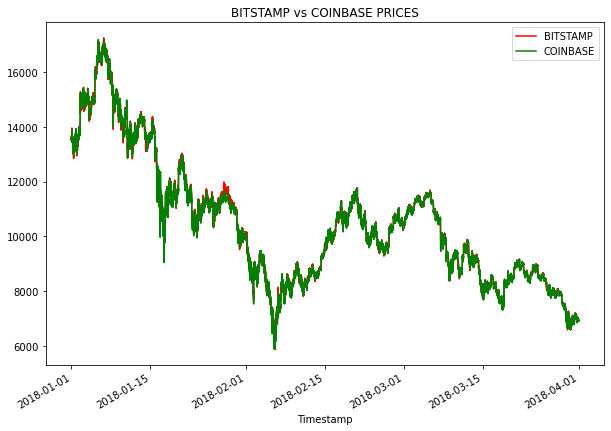

In [28]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced["Close"].plot(legend=True,
                     figsize=(10,7),
                     title="BITSTAMP vs COINBASE PRICES",
                     color="RED",
                     label="BITSTAMP")
coinbase_sliced["Close"].plot(legend=True,
                              figsize=(10,7),
                              color="green",
                              label="COINBASE")


<AxesSubplot:title={'center':'BITSTAMP vs COINBASE PRICES'}, xlabel='Timestamp'>

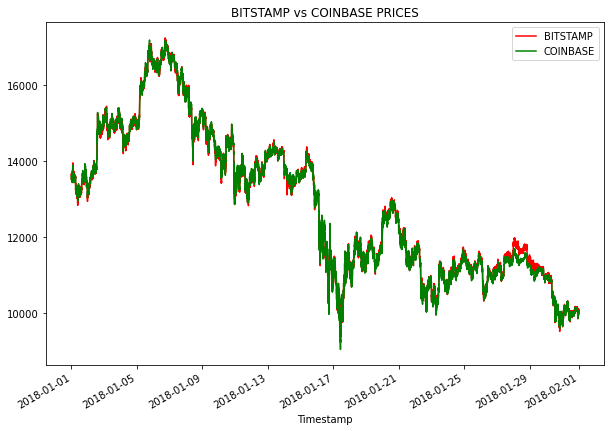

In [29]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.loc["2018-01-01":"2018-01-31","Close"].plot(legend=True,
                     figsize=(10,7),
                     title="BITSTAMP vs COINBASE PRICES",
                     color="RED",
                     label="BITSTAMP")
coinbase_sliced.loc["2018-01-01":"2018-01-31","Close"].plot(legend=True,
                              figsize=(10,7),
                              color="green",
                              label="COINBASE")

<AxesSubplot:title={'center':'BITSTAMP vs COINBASE PRICES'}, xlabel='Timestamp'>

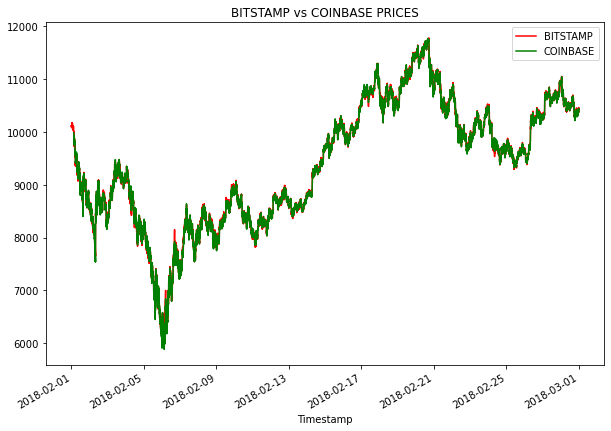

In [30]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc["2018-02-01":"2018-02-28","Close"].plot(legend=True,
                     figsize=(10,7),
                     title="BITSTAMP vs COINBASE PRICES",
                     color="RED",
                     label="BITSTAMP")
coinbase_sliced.loc["2018-02-01":"2018-02-28","Close"].plot(legend=True,
                              figsize=(10,7),
                              color="green",
                              label="COINBASE")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** In the begining of the month of febuarary the lowest point was on the sixth and the lowest point for january was towards the middle of the month. Also During January, the price at both exchanges is higher than in February. There is more spread during February with the lowest price close to $6,000 and the highest price close to $12,000.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'BITSTAMP vs COINBASE PRICES'}, xlabel='Timestamp'>

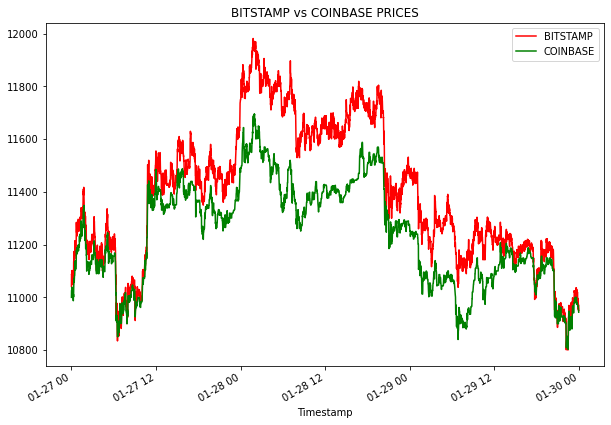

In [31]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-01-27":"2018-01-29","Close"].plot(legend=True,
                     figsize=(10,7),
                     title="BITSTAMP vs COINBASE PRICES",
                     color="RED",
                     label="BITSTAMP")
coinbase_sliced.loc["2018-01-27":"2018-01-29","Close"].plot(legend=True,
                              figsize=(10,7),
                              color="green",
                              label="COINBASE")

In [32]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc["2018-01-28":"2018-01-28","Close"]-coinbase_sliced.loc["2018-01-28":"2018-01-28","Close"]

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_early.describe())
arbitrage_spread_early.head()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

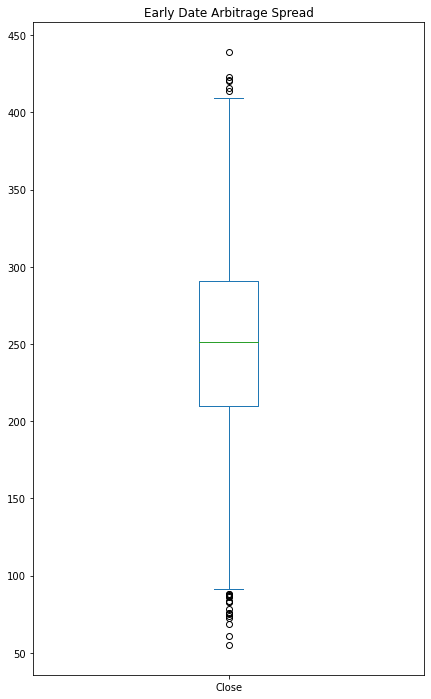

In [33]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(figsize=(7,12),
                            kind="box",
                            title="Early Date Arbitrage Spread")
plt.show()
                            

<AxesSubplot:title={'center':'BITSTAMP vs COINBASE PRICES Feb 26'}, xlabel='Timestamp'>

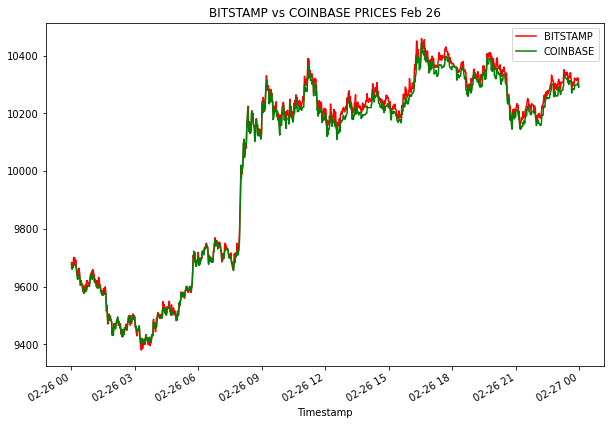

In [34]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-02-26":"2018-02-26","Close"].plot(legend=True,
                     figsize=(10,7),
                     title="BITSTAMP vs COINBASE PRICES Feb 26",
                     color="RED",
                     label="BITSTAMP")
coinbase_sliced.loc["2018-02-26":"2018-02-26","Close"].plot(legend=True,
                              figsize=(10,7),
                              color="green",
                              label="COINBASE")


In [35]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc["2018-02-26":"2018-02-26","Close"]-coinbase_sliced.loc["2018-02-26":"2018-02-26","Close"]

display(arbitrage_spread_middle.describe())
arbitrage_spread_middle.head()



count    1438.000000
mean       14.721537
std        13.454594
min       -25.010000
25%         5.412500
50%        15.585000
75%        23.925000
max        75.490000
Name: Close, dtype: float64

Timestamp
2018-02-26 00:00:00     7.00
2018-02-26 00:01:00    19.47
2018-02-26 00:02:00    -1.72
2018-02-26 00:03:00    16.66
2018-02-26 00:04:00     4.97
Name: Close, dtype: float64

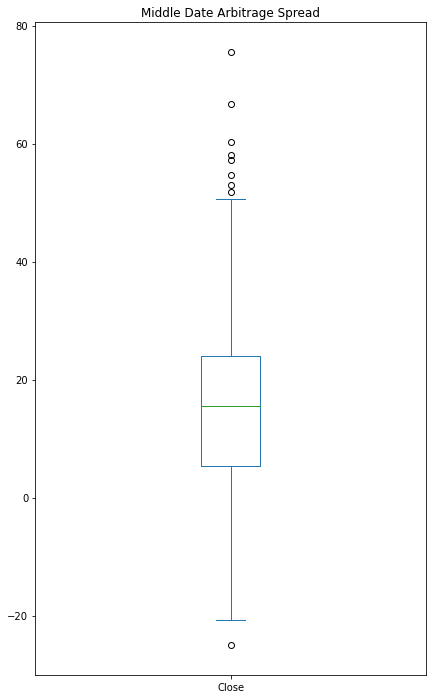

In [36]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(figsize=(7,12),
                            kind="box",
                            title="Middle Date Arbitrage Spread")
plt.show()
                

<AxesSubplot:title={'center':'BITSTAMP vs COINBASE PRICES March 10'}, xlabel='Timestamp'>

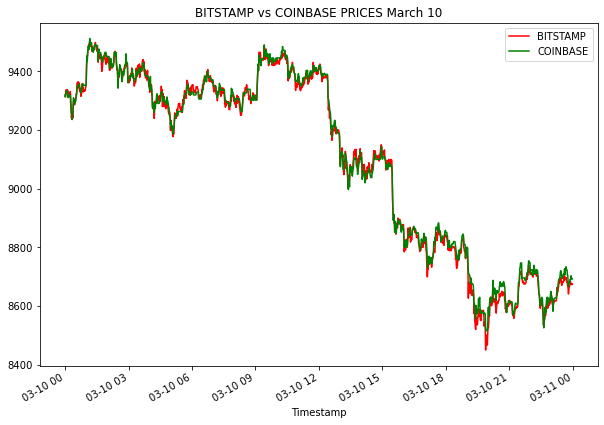

In [37]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc["2018-03-10":"2018-03-10","Close"].plot(legend=True,
                     figsize=(10,7),
                     title="BITSTAMP vs COINBASE PRICES March 10",
                     color="RED",
                     label="BITSTAMP")
coinbase_sliced.loc["2018-03-10":"2018-03-10","Close"].plot(legend=True,
                              figsize=(10,7),
                              color="green",
                              label="COINBASE")

In [38]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc["2018-03-10":"2018-03-10","Close"]-coinbase_sliced.loc["2018-03-10":"2018-03-10","Close"]

display(arbitrage_spread_late.describe())
arbitrage_spread_late.head()




count    1433.000000
mean       -6.541417
std        15.953638
min       -93.180000
25%       -16.040000
50%        -7.170000
75%         4.240000
max        36.860000
Name: Close, dtype: float64

Timestamp
2018-03-10 00:00:00    -5.88
2018-03-10 00:01:00     6.88
2018-03-10 00:02:00    15.98
2018-03-10 00:03:00    11.25
2018-03-10 00:04:00     3.72
Name: Close, dtype: float64

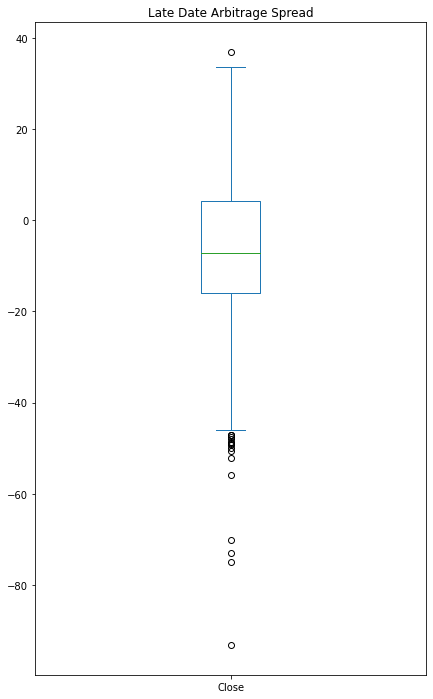

In [39]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(figsize=(7,12),
                            kind="box",
                            title="Late Date Arbitrage Spread")
plt.show()

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [40]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

print("Arbitrage Spread")
print("Early Date: Jan 28th 2018")
print()
arbitrage_spread_early = bitstamp.loc["2018-01-28":"2018-01-28", "Close"]-coinbase.loc["2018-01-28":"2018-01-28", "Close"]
print(arbitrage_spread_early)

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print()
print("Early Date Statistics: Jan 28th 2018")
early_boolean_filter = arbitrage_spread_early > 0
arbitrage_spread_early.loc[early_boolean_filter].describe()


Arbitrage Spread
Early Date: Jan 28th 2018

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1440, dtype: float64

Early Date Statistics: Jan 28th 2018


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [41]:
print("Arbitrage Spread")
print("middle Date: Feb 26th 2018")
print()
arbitrage_spread_middle = bitstamp.loc["2018-02-26":"2018-02-26", "Close"]-coinbase.loc["2018-02-26":"2018-02-26", "Close"]
print(arbitrage_spread_middle)

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print()
print("Middle Date Statistics: Feb 26th 2018")
middle_boolean_filter = arbitrage_spread_middle > 0
arbitrage_spread_middle.loc[middle_boolean_filter].describe()


Arbitrage Spread
middle Date: Feb 26th 2018

Timestamp
2018-02-26 00:00:00     7.00
2018-02-26 00:01:00    19.47
2018-02-26 00:02:00    -1.72
2018-02-26 00:03:00    16.66
2018-02-26 00:04:00     4.97
                       ...  
2018-02-26 23:55:00    21.96
2018-02-26 23:56:00    11.54
2018-02-26 23:57:00    16.99
2018-02-26 23:58:00     9.86
2018-02-26 23:59:00     3.03
Name: Close, Length: 1440, dtype: float64

Middle Date Statistics: Feb 26th 2018


count    1238.000000
mean       18.256801
std        10.751899
min         0.090000
25%         9.972500
50%        17.695000
75%        24.960000
max        75.490000
Name: Close, dtype: float64

In [42]:
print("Arbitrage Spread")
print("Late Date: March 10th 2018")
print()
arbitrage_spread_late = bitstamp.loc["2018-03-10":"2018-03-10", "Close"]-coinbase.loc["2018-03-10":"2018-03-10", "Close"]
print(arbitrage_spread_late)

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print()
print("Late Date Statistics: Mar 10th 2018")
late_boolean_filter = arbitrage_spread_late > 0
arbitrage_spread_late.loc[late_boolean_filter].describe()

Arbitrage Spread
Late Date: March 10th 2018

Timestamp
2018-03-10 00:00:00    -5.88
2018-03-10 00:01:00     6.88
2018-03-10 00:02:00    15.98
2018-03-10 00:03:00    11.25
2018-03-10 00:04:00     3.72
                       ...  
2018-03-10 23:55:00   -26.50
2018-03-10 23:56:00   -29.68
2018-03-10 23:57:00   -16.79
2018-03-10 23:58:00   -19.39
2018-03-10 23:59:00   -17.62
Name: Close, Length: 1440, dtype: float64

Late Date Statistics: Mar 10th 2018


count    466.000000
mean      10.886202
std        8.020605
min        0.010000
25%        4.707500
50%        8.870000
75%       15.547500
max       36.860000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [43]:

# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced["Close"].loc["2018-01-28"]

# Review the spread return DataFrame
print()
print("Spread return for EARLY DATE - Jan 28 2018")
spread_return_early




Spread return for EARLY DATE - Jan 28 2018


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64

In [44]:
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase_sliced["Close"].loc["2018-02-26"]

# Review the spread return DataFrame
print()
print("Spread return for Middle DATE - Feb 26 2018")
spread_return_middle



Spread return for Middle DATE - Feb 26 2018


Timestamp
2018-02-26 00:00:00    0.000723
2018-02-26 00:01:00    0.002015
2018-02-26 00:02:00         NaN
2018-02-26 00:03:00    0.001724
2018-02-26 00:04:00    0.000514
                         ...   
2018-02-26 23:55:00    0.002132
2018-02-26 23:56:00    0.001120
2018-02-26 23:57:00    0.001649
2018-02-26 23:58:00    0.000957
2018-02-26 23:59:00    0.000294
Name: Close, Length: 1440, dtype: float64

In [45]:
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced["Close"].loc["2018-03-10"]

# Review the spread return DataFrame
print()
print("Spread return for Late DATE - Mar 10 2018")
spread_return_late


Spread return for Late DATE - Mar 10 2018


Timestamp
2018-03-10 00:00:00         NaN
2018-03-10 00:01:00    0.000739
2018-03-10 00:02:00    0.001715
2018-03-10 00:03:00    0.001206
2018-03-10 00:04:00    0.000399
                         ...   
2018-03-10 23:55:00         NaN
2018-03-10 23:56:00         NaN
2018-03-10 23:57:00         NaN
2018-03-10 23:58:00         NaN
2018-03-10 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

In [46]:
arbitrage_spread_late.loc["2018-03-10 23:55:00"]

-26.5

In [47]:
arbitrage_spread_late[arbitrage_spread_late>0]

Timestamp
2018-03-10 00:01:00     6.88
2018-03-10 00:02:00    15.98
2018-03-10 00:03:00    11.25
2018-03-10 00:04:00     3.72
2018-03-10 00:05:00     3.74
                       ...  
2018-03-10 22:40:00     6.79
2018-03-10 23:04:00    12.68
2018-03-10 23:05:00     6.27
2018-03-10 23:15:00    13.77
2018-03-10 23:17:00     1.37
Name: Close, Length: 466, dtype: float64

In [48]:
arbitrage_spread_late=arbitrage_spread_late.dropna()
arbitrage_spread_late

Timestamp
2018-03-10 00:00:00    -5.88
2018-03-10 00:01:00     6.88
2018-03-10 00:02:00    15.98
2018-03-10 00:03:00    11.25
2018-03-10 00:04:00     3.72
                       ...  
2018-03-10 23:55:00   -26.50
2018-03-10 23:56:00   -29.68
2018-03-10 23:57:00   -16.79
2018-03-10 23:58:00   -19.39
2018-03-10 23:59:00   -17.62
Name: Close, Length: 1433, dtype: float64

In [51]:
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced["Close"].loc["2018-03-10"]

# Review the spread return DataFrame
print()
print("Spread return for Late DATE - Mar 10 2018")
spread_return_late=spread_return_late.dropna()
spread_return_late


Spread return for Late DATE - Mar 10 2018


Timestamp
2018-03-10 00:01:00    0.000739
2018-03-10 00:02:00    0.001715
2018-03-10 00:03:00    0.001206
2018-03-10 00:04:00    0.000399
2018-03-10 00:05:00    0.000401
                         ...   
2018-03-10 22:40:00    0.000794
2018-03-10 23:04:00    0.001477
2018-03-10 23:05:00    0.000729
2018-03-10 23:15:00    0.001592
2018-03-10 23:17:00    0.000158
Name: Close, Length: 466, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [52]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early > .01

# Review the first five profitable trades
print()
print("Profitable trades EARLY DATE")
profitable_trades_early = spread_return_early.loc[profitable_trades_early]
profitable_trades_early.head()





Profitable trades EARLY DATE


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [53]:
profitable_trades_middle = spread_return_middle > .01

# Review the first five profitable trades
print()
print("Profitable trades MIDDLE DATE")
profitable_trades_middle = spread_return_middle.loc[profitable_trades_middle]
profitable_trades_middle.head()





Profitable trades MIDDLE DATE


Series([], Name: Close, dtype: float64)

In [54]:
profitable_trades_late = spread_return_late > .01

# Review the first five profitable trades
print()
print("Profitable trades late DATE")
profitable_trades_late = spread_return_late.loc[profitable_trades_late]
profitable_trades_late.head()



Profitable trades late DATE


Series([], Name: Close, dtype: float64)

In [56]:
# Analysis of Profitable Trades all 3 dates
print("Number of all Profitable Trades for all 3 dates")
print()
print("Profitable trades EARLY DATE: ", len(profitable_trades_early))
print("Profitable trades MIDDLE DATE: ", len(profitable_trades_middle))
print("Profitable trades LATER DATE: ", len(profitable_trades_late))

Number of all Profitable Trades for all 3 dates

Profitable trades EARLY DATE:  1378
Profitable trades MIDDLE DATE:  0
Profitable trades LATER DATE:  0


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [57]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

print("EARLY DATE Profitable Trades")
print()
display(profitable_trades_early.describe())
print()
print("MIDDLE DATE Profitable Trades")
print()
display(profitable_trades_middle.describe())
print()
print("LATER DATE Profitable Trades")
print()
display(profitable_trades_late.describe())

EARLY DATE Profitable Trades



count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64


MIDDLE DATE Profitable Trades



count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


LATER DATE Profitable Trades



count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### There were only profitable returns on the early date.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [58]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_per_trade_early = profitable_trades_early * coinbase_sliced["Close"].loc["2018-01-28"]
profit_per_trade_middle = profitable_trades_middle * bitstamp_sliced["Close"].loc["2018-02-26"]
profit_per_trade_late = profitable_trades_late * coinbase_sliced["Close"].loc["2018-01-10"]

# Drop any missing values from the profit DataFrame

profit_per_trade_early = profit_per_trade_early.dropna()
profit_per_trade_middle = profit_per_trade_middle.dropna()
profit_per_trade_late = profit_per_trade_late.dropna()

# View the early profit DataFrame
print("Profits per trade Early")
display(profit_per_trade_early,len(profit_per_trade_early))
print()
print("Profits per trade Middle")
display(profit_per_trade_middle,len(profit_per_trade_middle))
print()
print("Profits per trade Late")
display(profit_per_trade_late,len(profit_per_trade_late))
print()

Profits per trade Early


Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

1378


Profits per trade Middle


Series([], Name: Close, dtype: float64)

0


Profits per trade Late


Series([], Name: Close, dtype: float64)

0

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [63]:
# Generate the summary statistics for the early profit per trade DataFr
print("Early date profits per trade")
display(profit_per_trade_early.describe())
print()
print("Middle date profits per trade")
display(profit_per_trade_middle.describe())
print()
print("Late date profits per trade")
display(profit_per_trade_late.describe())

Early date profits per trade


count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64


Middle date profits per trade


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


Late date profits per trade


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early date profit per trade'}, xlabel='hour'>

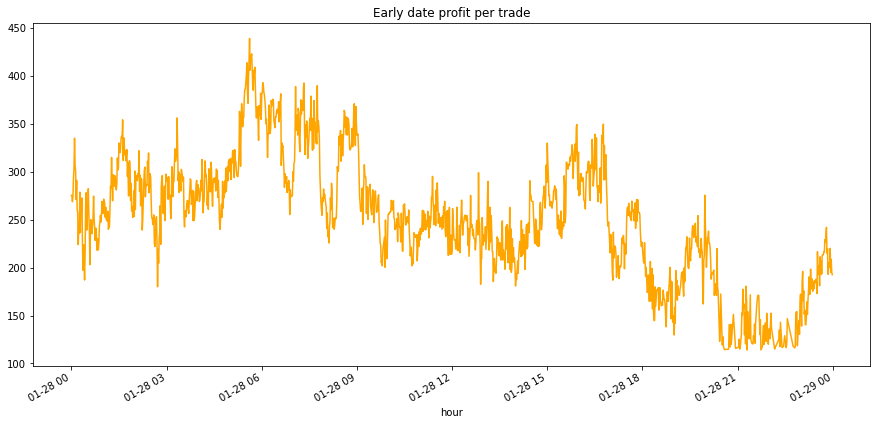

In [69]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(15,7),
                           title="Early date profit per trade",
                            color="orange",
                            label="$ profit",
                           xlabel="hour")


<AxesSubplot:title={'center':'Middle date profit per trade'}, xlabel='hour'>

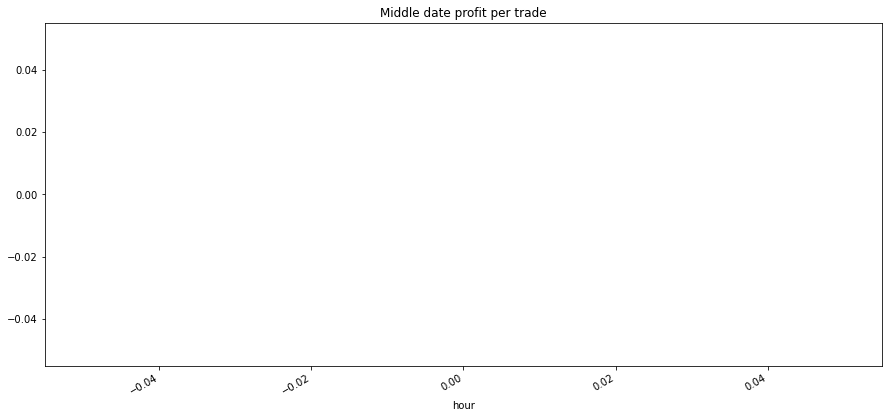

In [70]:
profit_per_trade_middle.plot(figsize=(15,7),
                             title="Middle date profit per trade",
                            color="Red",
                            label="$ profit",
                           xlabel="hour")

                             
                                    

<AxesSubplot:title={'center':'late date profit per trade'}, xlabel='hour'>

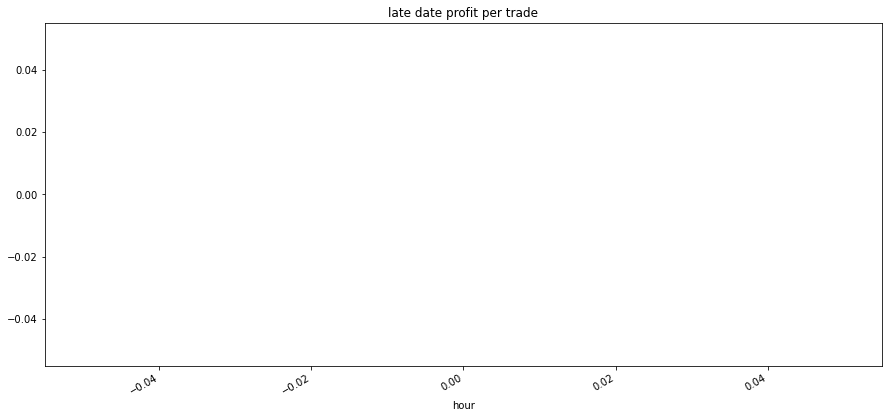

In [71]:
profit_per_trade_late.plot(figsize=(15,7),
                             title="late date profit per trade",
                            color="Red",
                            label="$ profit",
                           xlabel="hour")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [72]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print("Potential arbitrate profits: EARLY Date")
display(profit_per_trade_early.sum())
print()
print("Potential arbitrate profits: MIDDLE Date")
display(profit_per_trade_middle.sum())
print()
print("Potential arbitrate profits: LATER Date")
display(profit_per_trade_late.sum())
print()

Potential arbitrate profits: EARLY Date


349918.2900000001


Potential arbitrate profits: MIDDLE Date


0.0


Potential arbitrate profits: LATER Date


0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [74]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-28 00:00:00       275.38
2018-01-28 00:01:00       550.38
2018-01-28 00:02:00       819.15
2018-01-28 00:03:00      1094.18
2018-01-28 00:04:00      1388.44
                         ...    
2018-01-28 23:55:00    349126.69
2018-01-28 23:56:00    349321.80
2018-01-28 23:57:00    349530.54
2018-01-28 23:58:00    349725.66
2018-01-28 23:59:00    349918.29
Name: Close, Length: 1378, dtype: float64

<AxesSubplot:title={'center':'Cumulative early date profit per trade'}, xlabel='hour'>

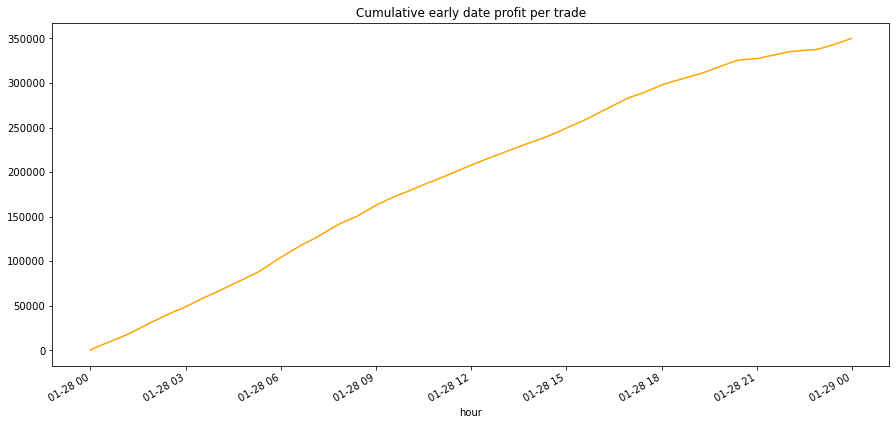

In [75]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15,7),
                           title="Cumulative early date profit per trade",
                            color="orange",
                            label="$ profit",
                           xlabel="hour")


In [76]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Middle date profit per trade'}, xlabel='hour'>

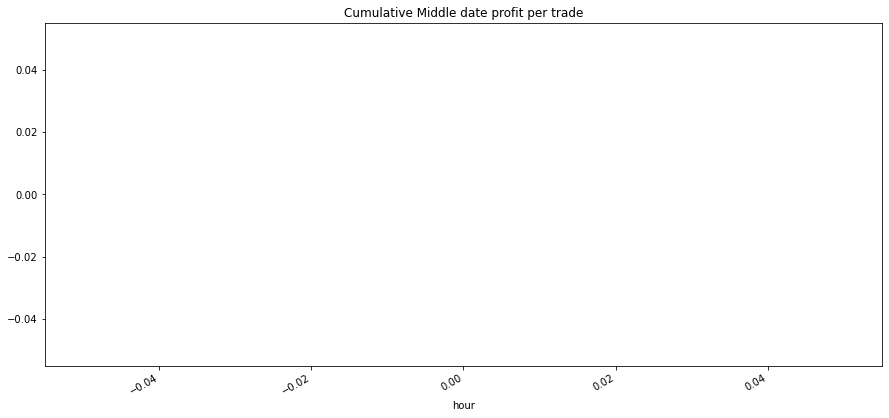

In [77]:
cumulative_profit_middle.plot(figsize=(15,7),
                           title="Cumulative Middle date profit per trade",
                            color="red",
                            label="$ profit",
                           xlabel="hour")

In [78]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative late date profit per trade'}, xlabel='hour'>

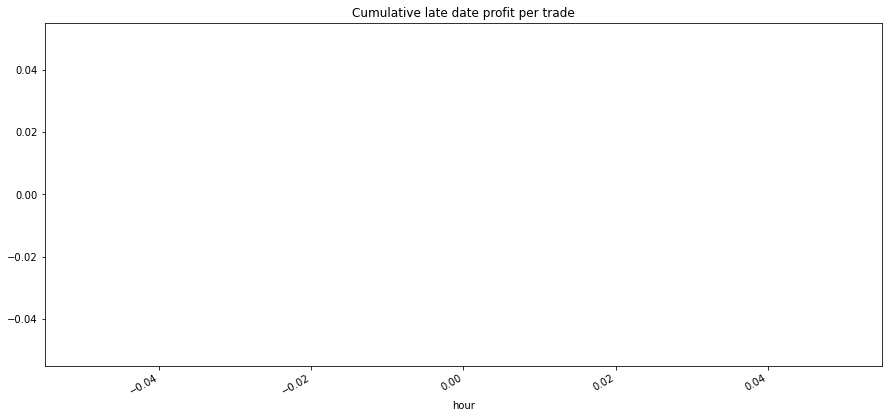

In [79]:
cumulative_profit_late.plot(figsize=(15,7),
                           title="Cumulative late date profit per trade",
                            color="red",
                            label="$ profit",
                           xlabel="hour")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After review of the 3 different dates. We can only find opportunities for profit on the Early Date, closer to the end of January.